In [1]:
import json
import random

import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from pycocotools.coco import COCO

In [2]:
%matplotlib inline

# 目标检测标注文件

In [3]:
dataDir = 'E:/data/COCO'
dataType = 'val2017'
annFile = '{}/annotations/instances_{}.json'.format(dataDir, dataType)

imageDir = '{}/{}/'.format(dataDir, dataType)

# [coco.py](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py)

# 初始化 COCO

In [4]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.69s)
creating index...
index created!


# 展示 COCO 的类别和超类

In [5]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



In [6]:
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO supercategories: 
animal food sports vehicle outdoor person furniture appliance kitchen electronic accessory indoor


# 用 JSON 解析 COCO 的标注

In [7]:
coco_j = json.load(open(annFile, 'r', encoding='utf-8'))
coco_j.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [8]:
coco_j['info'].keys()

dict_keys(['description', 'url', 'version', 'year', 'contributor', 'date_created'])

In [9]:
coco_j['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

# 获取类别和超类

In [10]:
coco_categories = {d['id']: d['name'] for d in coco_j['categories']}
coco_categories

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [11]:
coco_supercategories = list({d['supercategory'] for d in coco_j['categories']})
print(*coco_supercategories)

animal food sports vehicle outdoor person furniture appliance kitchen electronic accessory indoor


# COCO API 和 JSON 解析

```json
annotation{
    "id": int, 
    "image_id": int, 
    "category_id": int, 
    "segmentation": RLE or [polygon], 
    "area": float, 
    "bbox": [x,y,width,height], 
    "iscrowd": 0 or 1,
}
```

标注文件里面包含一个巨大的 `json` 格式数据，有通用字段 `info`，`licenses`，`images` 和目标检测字段 `annotation`，`categories`

`annotations` 字段里包含多个含上述字段的 `json`，即 `dict`

`id` 该标注信息的 id

`image_id` 该标注所对应的图片的 id，多个标注信息可对应一张图片，即一张图片上可能有多个物体

`category_id` 类别 id，可用于获取类别名称

`segmentation` RLE(略)；[polygon]是一个 `list`，`list` 里面可能有多个子 `list`，可能一个物体被遮挡，有多个多边形。子 `list` 包含分割物体的边界的多边形的x,y坐标，以x,y形式依次排列。

`area` 轮廓面积

`bbox` 目标物体的最小包围矩形的左上坐标及高宽信息

`iscrowd` 是否大量标注对象(如人群)

In [12]:
annotations = coco_j['annotations']
len(annotations)

36781

In [13]:
for i in range(3):
    print(annotations[i])
    print()

{'segmentation': [[510.66, 423.01, 511.72, 420.03, 510.45, 416.0, 510.34, 413.02, 510.77, 410.26, 510.77, 407.5, 510.34, 405.16, 511.51, 402.83, 511.41, 400.49, 510.24, 398.16, 509.39, 397.31, 504.61, 399.22, 502.17, 399.64, 500.89, 401.66, 500.47, 402.08, 499.09, 401.87, 495.79, 401.98, 490.59, 401.77, 488.79, 401.77, 485.39, 398.58, 483.9, 397.31, 481.56, 396.35, 478.48, 395.93, 476.68, 396.03, 475.4, 396.77, 473.92, 398.79, 473.28, 399.96, 473.49, 401.87, 474.56, 403.47, 473.07, 405.59, 473.39, 407.71, 476.68, 409.41, 479.23, 409.73, 481.56, 410.69, 480.4, 411.85, 481.35, 414.93, 479.86, 418.65, 477.32, 420.03, 476.04, 422.58, 479.02, 422.58, 480.29, 423.01, 483.79, 419.93, 486.66, 416.21, 490.06, 415.57, 492.18, 416.85, 491.65, 420.24, 492.82, 422.9, 493.56, 424.39, 496.43, 424.6, 498.02, 423.01, 498.13, 421.31, 497.07, 420.03, 497.07, 415.15, 496.33, 414.51, 501.1, 411.96, 502.06, 411.32, 503.02, 415.04, 503.33, 418.12, 501.1, 420.24, 498.98, 421.63, 500.47, 424.39, 505.03, 423.32

In [14]:
annIds = coco.getAnnIds()
len(annIds)

36781

In [15]:
imgIds = coco.getImgIds()
len(imgIds)

5000

```json
image{
    "id": int, 
    "width": int, 
    "height": int, 
    "file_name": str, 
    "license": int, 
    "flickr_url": str, 
    "coco_url": str, 
    "date_captured": datetime,
}
```

`image` 字段里包含多个含上述字段的 `json`，即 `dict`

`id` 图像 id

`width` 图像宽

`height` 图像高

`file_name` 图像文件名，去除文件名前面的0可获得id

`license` 许可证

`flickr_url` flickr url

`coco_url` coco url

`date_captured` 图像捕获时间

In [16]:
images = coco_j['images']
len(images)

5000

In [17]:
for i in range(3):
    print(images[i])
    print()

{'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}

{'license': 1, 'file_name': '000000037777.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg', 'height': 230, 'width': 352, 'date_captured': '2013-11-14 20:55:31', 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg', 'id': 37777}

{'license': 4, 'file_name': '000000252219.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg', 'height': 428, 'width': 640, 'date_captured': '2013-11-14 22:32:02', 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg', 'id': 252219}



# 采样

In [18]:
n = random.randint(0, len(annotations))
n

16678

In [19]:
sample_ann = annotations[n]
sample_ann

{'segmentation': [[291.86,
   193.66,
   300.26,
   195.28,
   302.85,
   198.19,
   309.31,
   202.39,
   311.25,
   208.53,
   312.54,
   214.02,
   314.16,
   221.46,
   314.16,
   229.86,
   313.84,
   240.84,
   310.93,
   248.6,
   311.25,
   250.86,
   311.25,
   262.17,
   310.28,
   264.76,
   311.9,
   269.28,
   312.22,
   274.45,
   311.9,
   280.27,
   309.96,
   284.47,
   309.96,
   288.02,
   310.28,
   292.55,
   310.28,
   294.16,
   311.9,
   298.69,
   311.9,
   301.6,
   311.9,
   303.86,
   312.54,
   304.5,
   312.18,
   306.87,
   304.63,
   306.87,
   302.12,
   306.24,
   304.0,
   302.47,
   305.26,
   299.33,
   306.52,
   294.93,
   305.26,
   279.46,
   303.0,
   275.85,
   303.0,
   274.05,
   303.0,
   271.35,
   303.91,
   268.19,
   303.91,
   264.59,
   303.45,
   260.53,
   302.1,
   256.93,
   300.75,
   253.77,
   298.95,
   251.97,
   298.5,
   250.16,
   293.54,
   250.16,
   289.48,
   252.42,
   287.23,
   252.87,
   284.98,
   253.32,
   286.7

In [20]:
sample_imgId = sample_ann['image_id']
sample_imgId

214753

In [21]:
annId = sample_ann['id']
annId

56944

In [22]:
category_id = sample_ann['category_id']
coco_categories[category_id]

'horse'

In [23]:
image_path = imageDir
image_path

'E:/data/COCO/val2017/'

In [24]:
coco.loadImgs(sample_imgId)

[{'license': 4,
  'file_name': '000000214753.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000214753.jpg',
  'height': 424,
  'width': 640,
  'date_captured': '2013-11-18 21:17:41',
  'flickr_url': 'http://farm9.staticflickr.com/8073/8392128987_e7b98a0936_z.jpg',
  'id': 214753}]

In [25]:
coco.loadAnns(annId)

[{'segmentation': [[291.86,
    193.66,
    300.26,
    195.28,
    302.85,
    198.19,
    309.31,
    202.39,
    311.25,
    208.53,
    312.54,
    214.02,
    314.16,
    221.46,
    314.16,
    229.86,
    313.84,
    240.84,
    310.93,
    248.6,
    311.25,
    250.86,
    311.25,
    262.17,
    310.28,
    264.76,
    311.9,
    269.28,
    312.22,
    274.45,
    311.9,
    280.27,
    309.96,
    284.47,
    309.96,
    288.02,
    310.28,
    292.55,
    310.28,
    294.16,
    311.9,
    298.69,
    311.9,
    301.6,
    311.9,
    303.86,
    312.54,
    304.5,
    312.18,
    306.87,
    304.63,
    306.87,
    302.12,
    306.24,
    304.0,
    302.47,
    305.26,
    299.33,
    306.52,
    294.93,
    305.26,
    279.46,
    303.0,
    275.85,
    303.0,
    274.05,
    303.0,
    271.35,
    303.91,
    268.19,
    303.91,
    264.59,
    303.45,
    260.53,
    302.1,
    256.93,
    300.75,
    253.77,
    298.95,
    251.97,
    298.5,
    250.16,
    293.54,
  

In [26]:
coco.loadImgs(sample_imgId)

[{'license': 4,
  'file_name': '000000214753.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000214753.jpg',
  'height': 424,
  'width': 640,
  'date_captured': '2013-11-18 21:17:41',
  'flickr_url': 'http://farm9.staticflickr.com/8073/8392128987_e7b98a0936_z.jpg',
  'id': 214753}]

In [38]:
for image_info in images:
    img_id = image_info['id']
    if img_id == sample_imgId:
        image_path += image_info['file_name']
        break

# 展示 image，segment，bbox

In [28]:
image_path

'E:/data/COCO/val2017/000000214753.jpg'

In [29]:
img = Image.open(image_path).convert("RGB")
img.height, img.width

(424, 640)

In [30]:
segment = sample_ann['segmentation']
len(segment)

1

In [31]:
contours = [np.array(pts, dtype=np.int32).reshape(-1,2) for pts in segment]

In [32]:
area_sum = 0
for contour in contours:
    area = cv2.contourArea(contour)
    area_sum += area
    print(area)
print('sum:', area_sum)

4617.0
sum: 4617.0


In [33]:
mask = np.zeros((img.height, img.width), dtype=np.uint8)
mask = cv2.drawContours(mask, contours, -1, 255, 2)

In [34]:
img_c = cv2.drawContours(np.array(img), contours, -1, (0,0,255), 2)

In [35]:
bbox = sample_ann['bbox']
bbox

[252.98, 193.38, 61.18, 113.49]

In [36]:
x, y, w, h = bbox
img_b = cv2.rectangle(np.array(img), (int(x), int(y)), (int(x+w), int(y+h)), (0,0,255), 2)

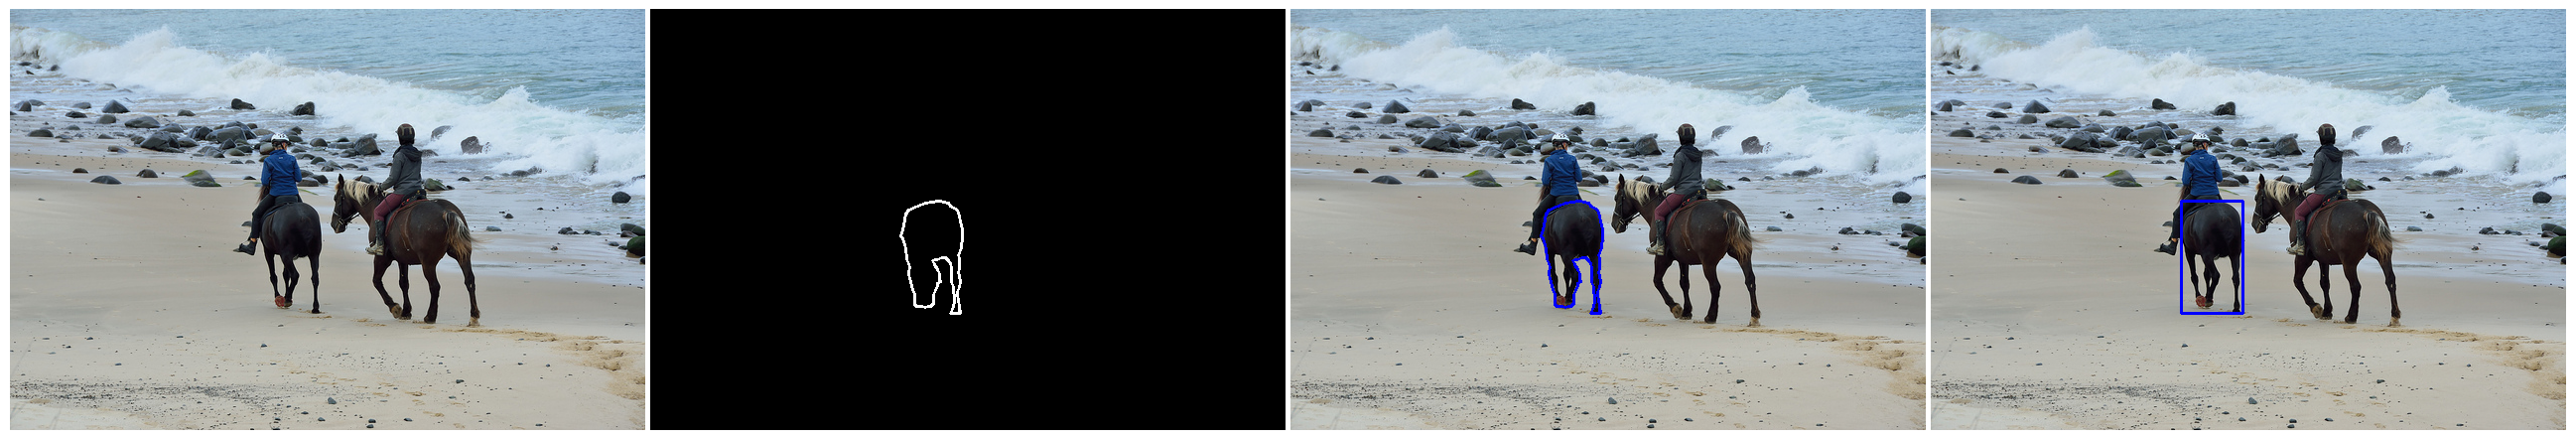

In [37]:
dpi=100
height, width = img.height, img.width + 5
plt.figure(figsize=(width*4/dpi,height/dpi), dpi=dpi)

plt.subplot(1,4,1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(img_c)
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(img_b)
plt.axis('off')
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
plt.show()